In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="ticks")

import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor


from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline





from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [10]:

plt.style.use(['ggplot', 'seaborn-darkgrid'])


plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] = '--'

/var/folders/g1/stdtphmx6j36mvd7gc84dx3w0000gn/T/ipykernel_12818/2480058980.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-darkgrid'])


Questions to answer

1. Which factors contribute most to the number of bicycles being checkout over the course of a given day?
2.How much impact doeas weather have on demand?
3. How does the behaviour of casual users differ from subscribers?

In [11]:
df=pd.read_csv('data/train.csv', parse_dates=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [12]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
df_corr = df.drop("datetime", axis=1)

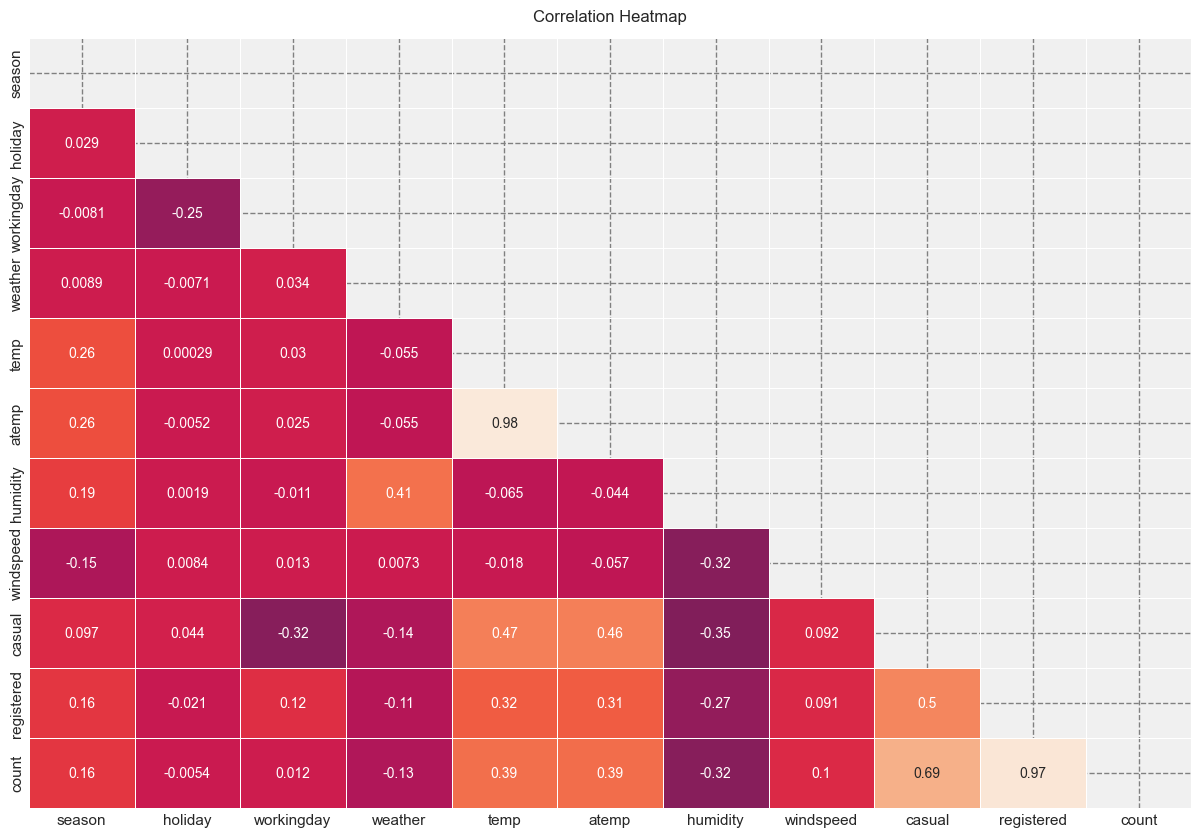

In [15]:
plt.figure(figsize = (15,10))

mask=np.triu(np.ones_like(df_corr.corr(), dtype=bool))

heatmap=sns.heatmap(df_corr.corr(), annot = True, cbar=False, vmin=-1, vmax=1, mask=mask, linewidth=.5)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [16]:

def extract_day_time_fe(df: pd.DataFrame, datetime: str) -> pd.DataFrame:
    
    df["datetime"] = pd.to_datetime(df["datetime"])
  
    df[f"{datetime}_year"] = df[datetime].dt.year
    df[f"{datetime}_hour"] = df[datetime].dt.hour
    df[f"{datetime}_month"] = df[datetime].dt.month
    df[f"{datetime}_month_name"] = df[datetime].dt.month_name()
    df[f"{datetime}_day"] = df[datetime].dt.day
    df[f"{datetime}_day_name"] = df[datetime].dt.day_name()
 
    return df

In [17]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [18]:
df = extract_day_time_fe(df, "datetime")

In [19]:
df.set_index(["datetime"], inplace = True)

In [20]:
df.rename(columns={'count':'total'},inplace=True)

In [21]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday


In [22]:
#Examine whether the bicycle count shows any time-related patterns.
#Extract features like hour, month etc. from the datetime column.
#Plot small sections of the data (1 day, 1 week etc.)
#Group by a time feature and observe grouped means

In [23]:
df.isnull().any()

season                 False
holiday                False
workingday             False
weather                False
temp                   False
atemp                  False
humidity               False
windspeed              False
casual                 False
registered             False
total                  False
datetime_year          False
datetime_hour          False
datetime_month         False
datetime_month_name    False
datetime_day           False
datetime_day_name      False
dtype: bool

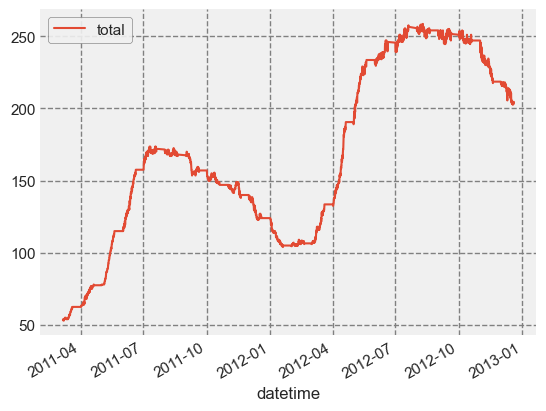

In [24]:
df.rolling(1000)["total"].median().plot(y='total')
legend = plt.legend(frameon=True, loc="upper left", fancybox=True, edgecolor='gray')
legend.get_frame().set_alpha(0.9)
sns.despine()

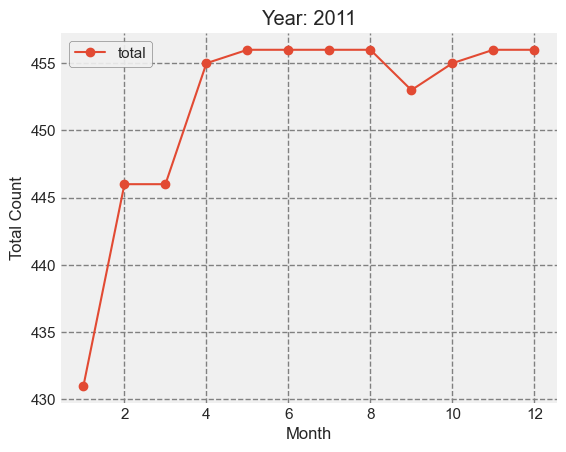

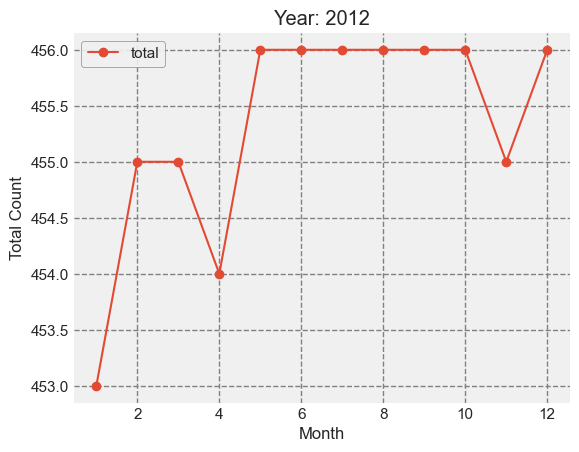

In [25]:
years = df['datetime_year'].unique()
for year in years:
    # Filter the DataFrame for the specific year
    df_year = df[df['datetime_year'] == year]
    
    # Group by month, count the occurrences, and unstack
    df_plot = df_year.groupby('datetime_month')['total'].size()
    
    # Plot the data
    df_plot.plot(kind='line', marker='o', title=f"Year: {year}")
    plt.xlabel("Month")
    plt.ylabel("Total Count")
   
    legend = plt.legend(frameon=True, loc="upper left", fancybox=True, edgecolor='gray')
    legend.get_frame().set_alpha(0.9)
    sns.despine()
    plt.show()

In [26]:
df.reset_index(inplace=True)

In [27]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,12,December,19,Wednesday


In [28]:
df.groupby('datetime_month')["total"].size()

datetime_month
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: total, dtype: int64

In [29]:
df_year

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
datetime,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,1,0,0,1,14.76,18.940,66,0.0000,5,43,48,2012,0,1,January,1,Sunday
2012-01-01 01:00:00,1,0,0,1,14.76,17.425,66,8.9981,15,78,93,2012,1,1,January,1,Sunday
2012-01-01 02:00:00,1,0,0,1,13.12,17.425,76,0.0000,16,59,75,2012,2,1,January,1,Sunday
2012-01-01 03:00:00,1,0,0,1,12.30,16.665,81,0.0000,11,41,52,2012,3,1,January,1,Sunday
2012-01-01 04:00:00,1,0,0,1,11.48,15.150,81,6.0032,0,8,8,2012,4,1,January,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday


In [30]:
##b 2. How do Holidays affect Bike Sharing Demand?

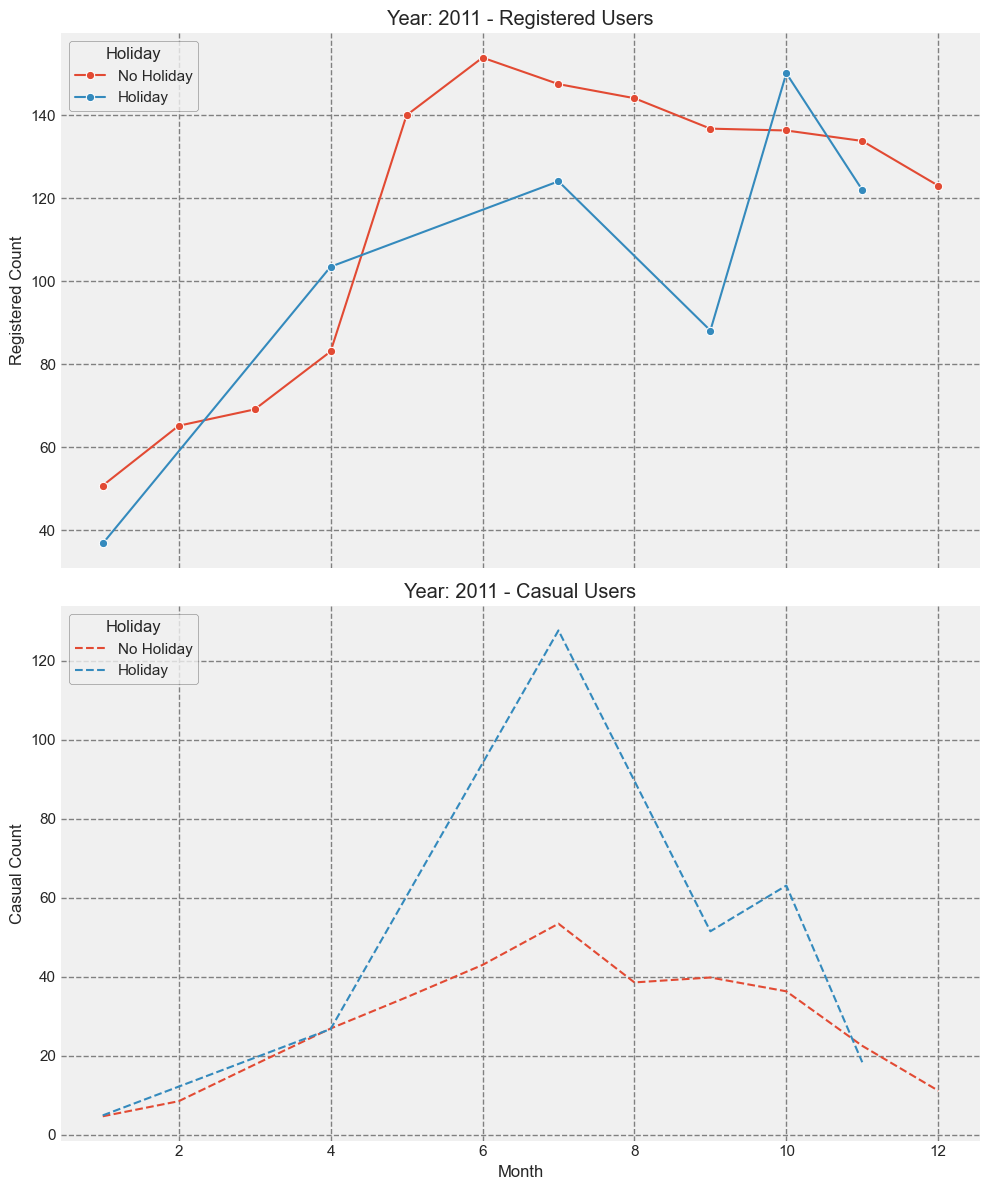

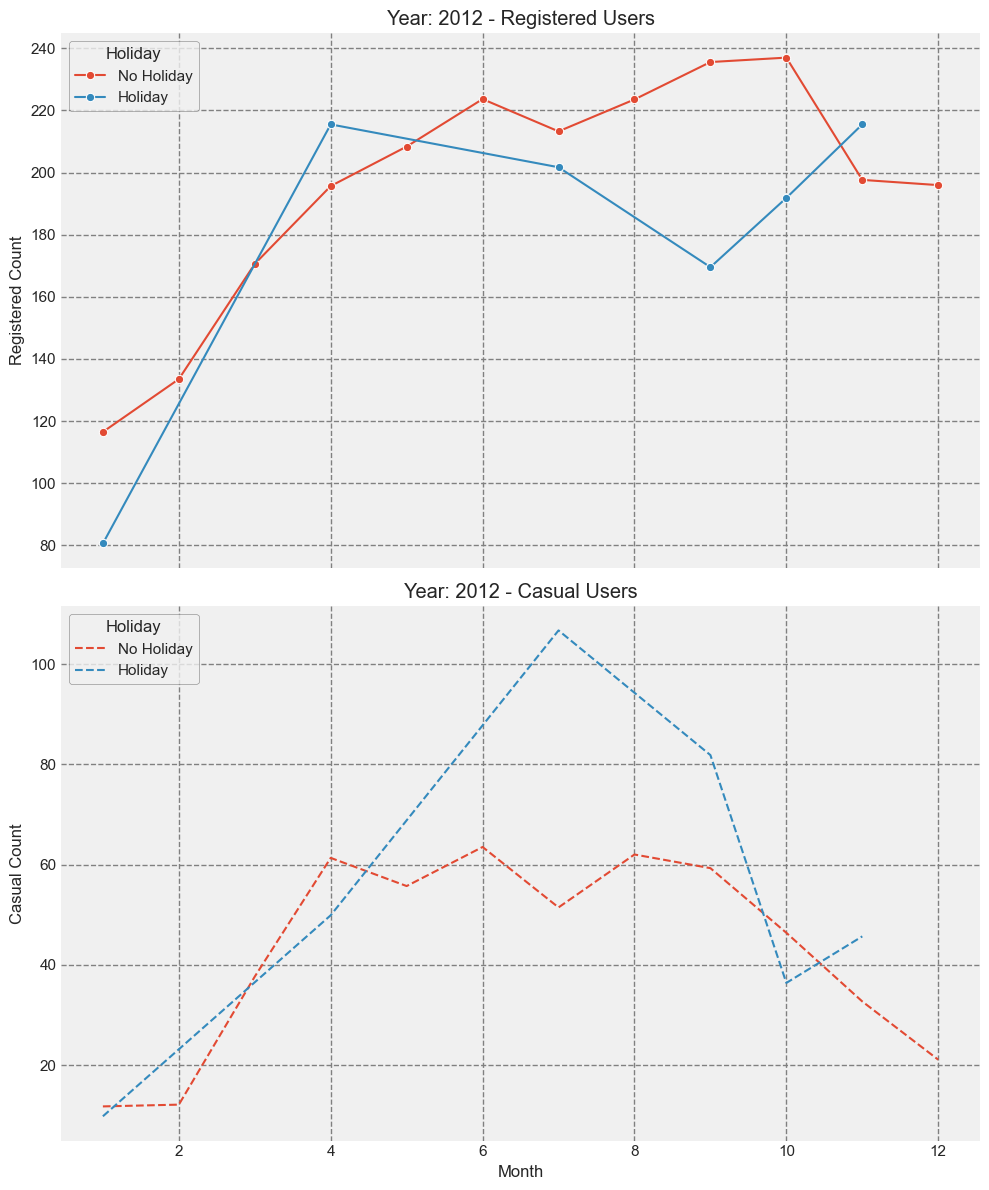

In [31]:
years = df['datetime_year'].unique()
for year in years:
    # Filter the DataFrame for the specific year
    df_year = df[df['datetime_year'] == year]
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
    
   # Plot 'registered' with holiday as hue

    sns.lineplot(x="datetime_month", y="registered", data=df_year, hue="holiday", ax=axes[0], marker='o', label="Registered",errorbar=None)
    axes[0].set_title(f"Year: {year} - Registered Users")
    axes[0].set_ylabel("Registered Count")
    axes[0].legend(frameon=True,title="Holiday", loc="upper left", labels=["No Holiday", "Holiday"],fancybox=True, edgecolor='gray',)  
    
    # Plot 'casual' with holiday as hue, on the same axis
    sns.lineplot(x="datetime_month", y="casual", data=df_year, hue="holiday", ax=axes[1], linestyle='--', label="Casual", errorbar=None)
    axes[1].set_title(f"Year: {year} - Casual Users")
    axes[1].set_xlabel("Month", fontsize=12)
    axes[1].set_ylabel("Casual Count")
    axes[1].legend(frameon=True,title="Holiday", loc="upper left", labels=["No Holiday", "Holiday"], fancybox=True, edgecolor='gray')  
    


     # Remove the top and right spines for a cleaner look
    sns.despine()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    


In [32]:
# Outlier analysis

In [33]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,1,January,1,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,January,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,1,January,1,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,1,January,1,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,1,January,1,Saturday


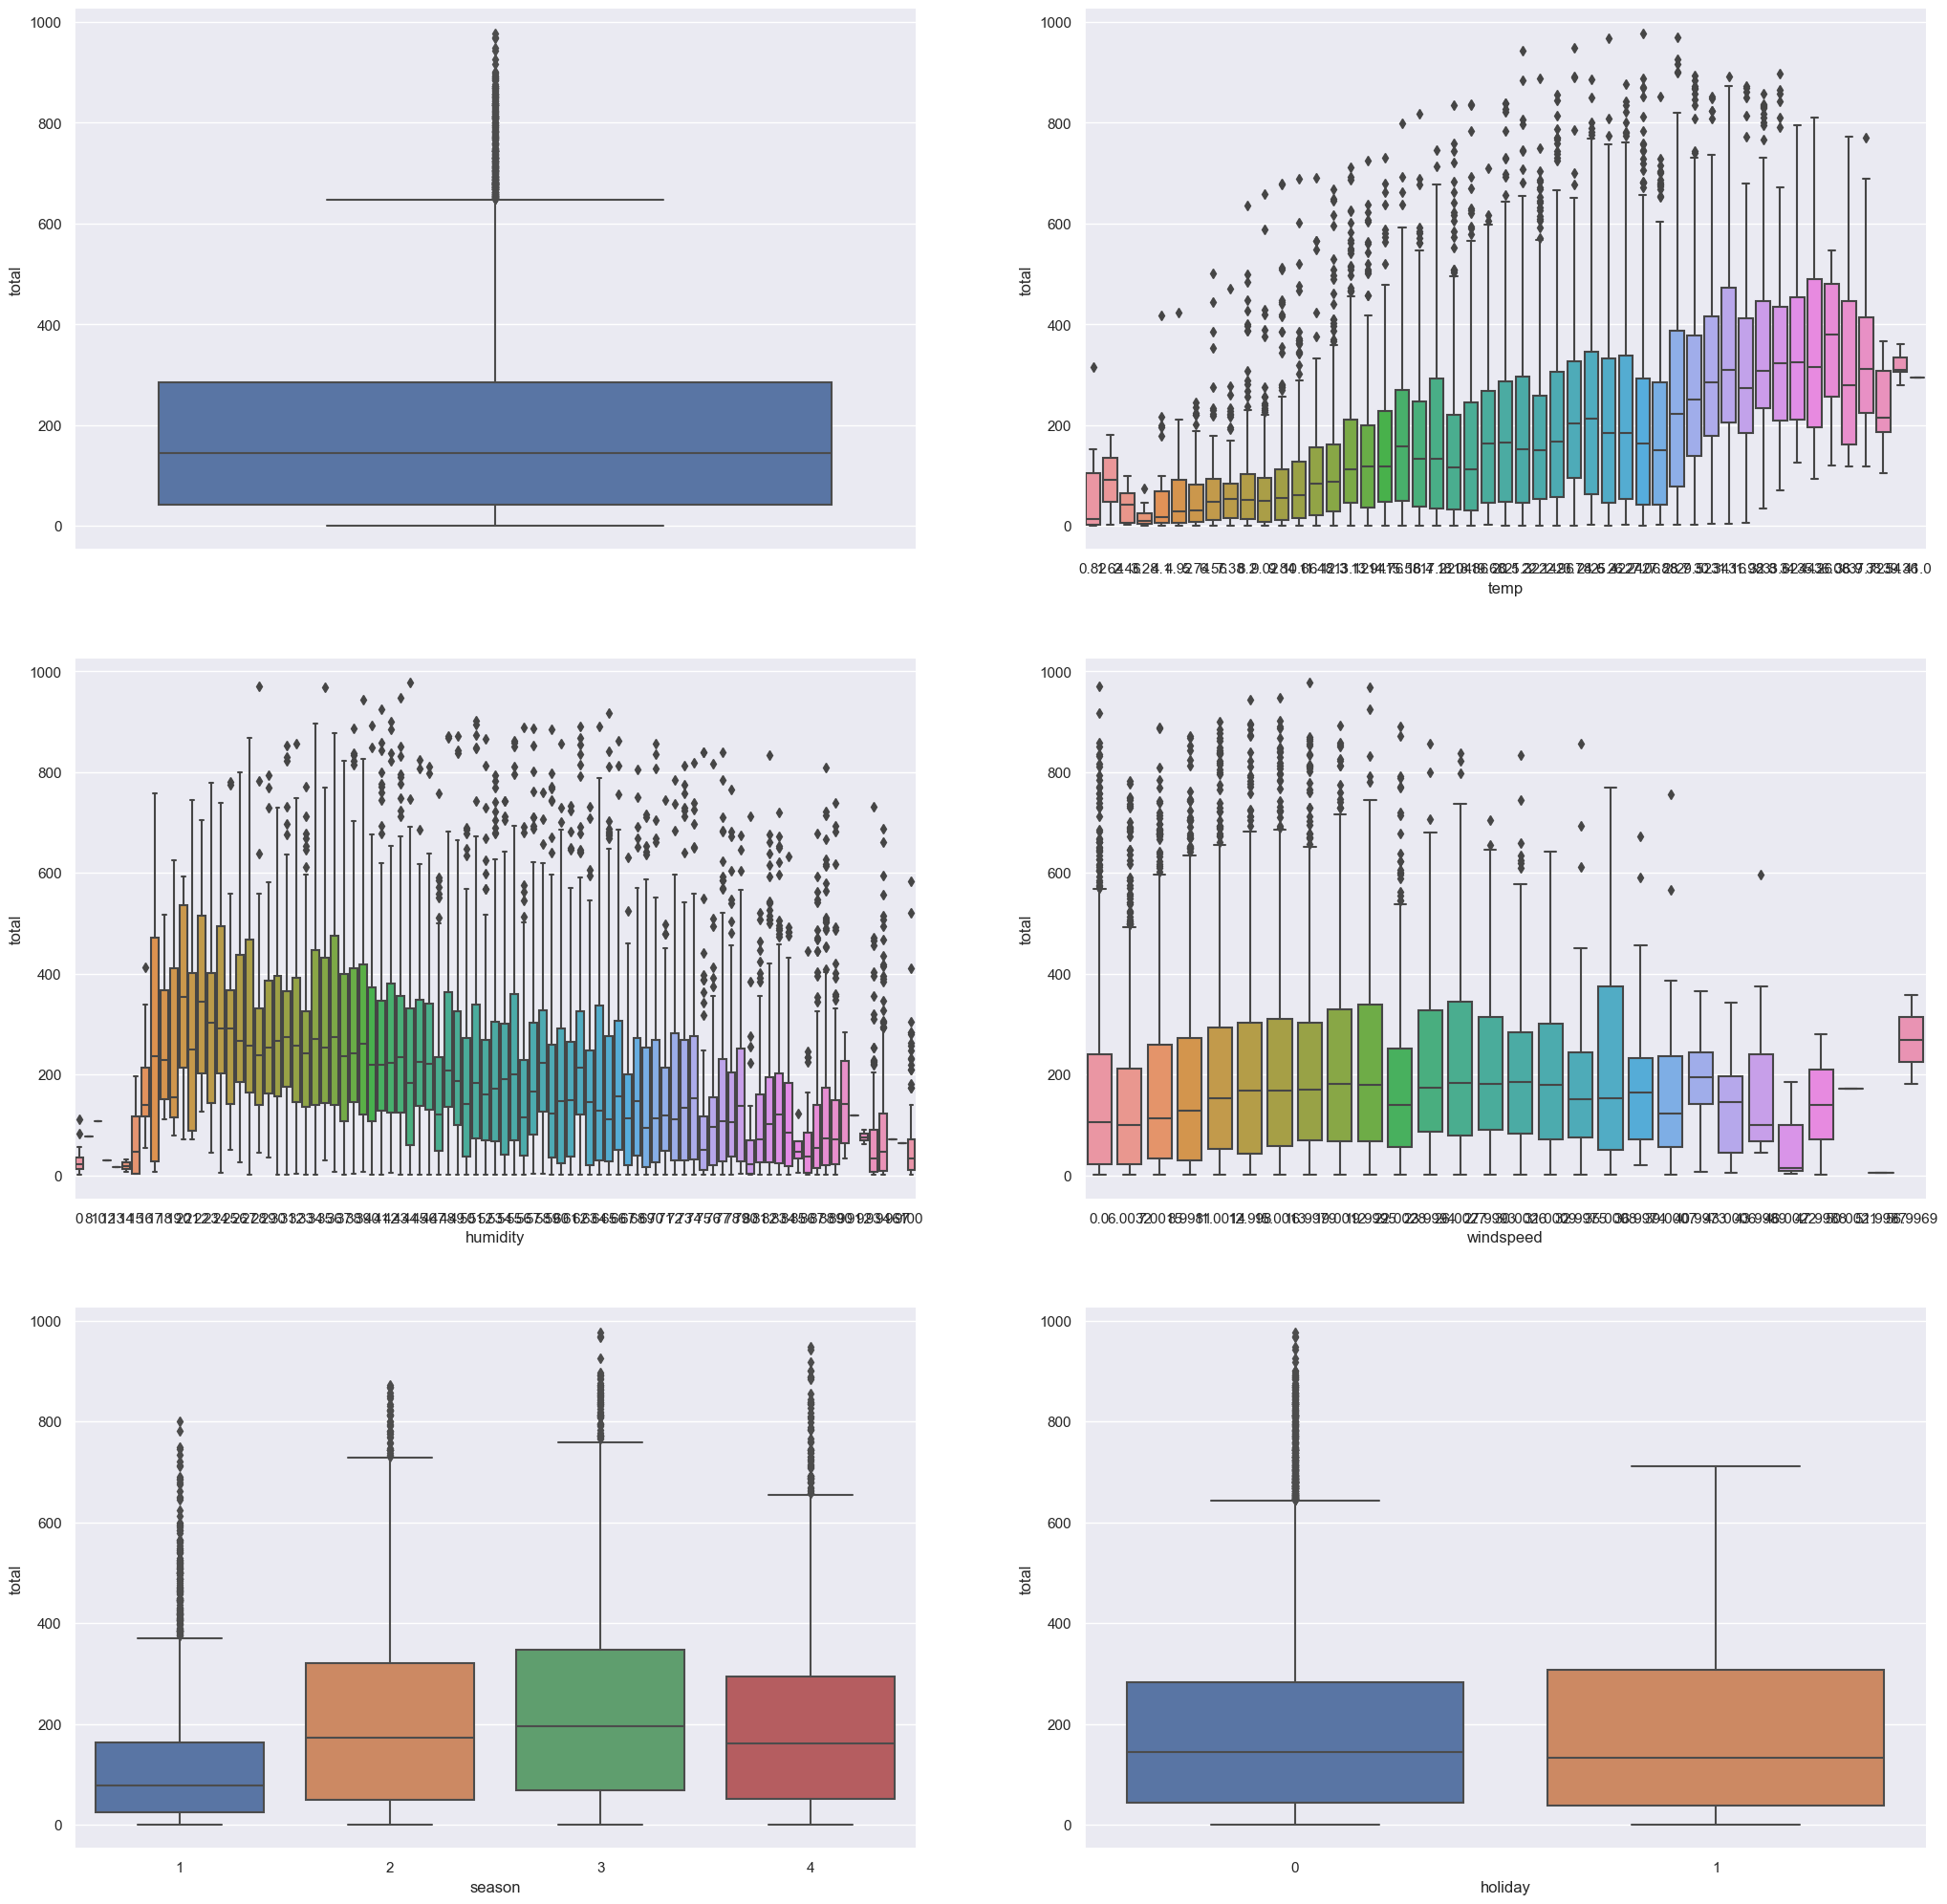

In [34]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(25, 25)
sns.boxplot(data=df, y="total",orient="v",ax=axes[0][0])
sns.boxplot(data=df, y="total",x="temp",orient="v",ax=axes[0][1])
sns.boxplot(data=df, y="total",x="humidity",orient="v",ax=axes[1][0])
sns.boxplot(data=df, y="total",x="windspeed",orient="v",ax=axes[1][1])
sns.boxplot(data=df, y="total",x="season",orient="v",ax=axes[2][0])
sns.boxplot(data=df ,y="total",x="holiday",orient="v",ax=axes[2][1])


sns.despine()


In [35]:
df.reset_index(inplace=True)

In [36]:
df

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,12,December,19,Wednesday


In [37]:
df.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [38]:
df.groupby('datetime_hour').total.mean()

datetime_hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

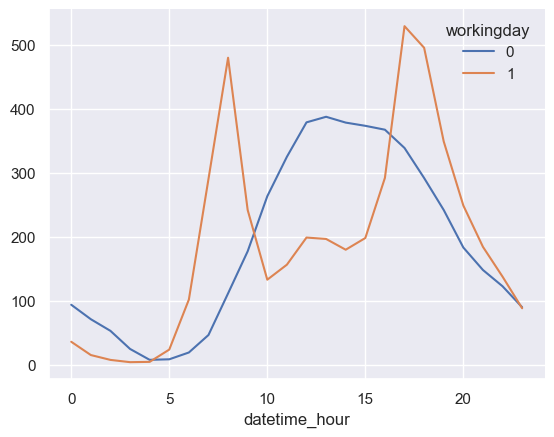

In [39]:
df.groupby(['datetime_hour','workingday']).total.mean().unstack().plot()
sns.despine()

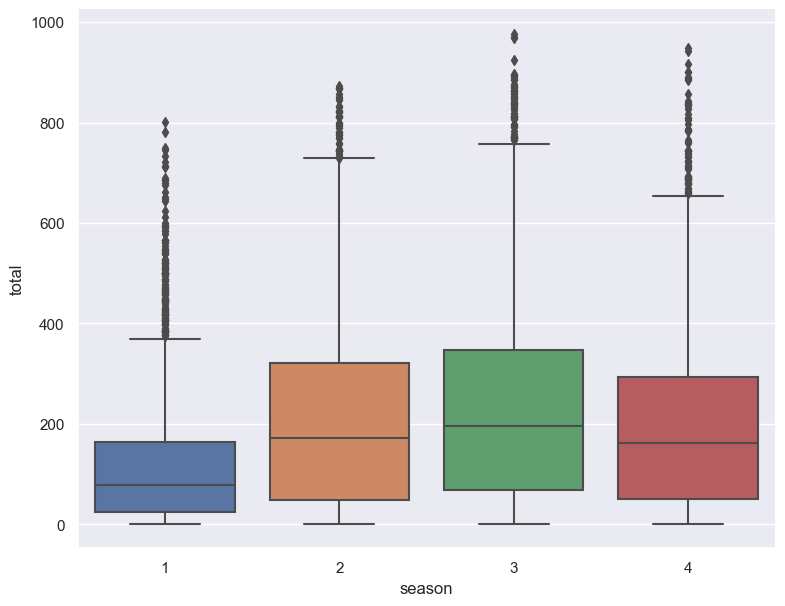

In [40]:
plt.figure(figsize=(9,7))
sns.boxplot( x='season', y='total', data=df);
sns.despine()

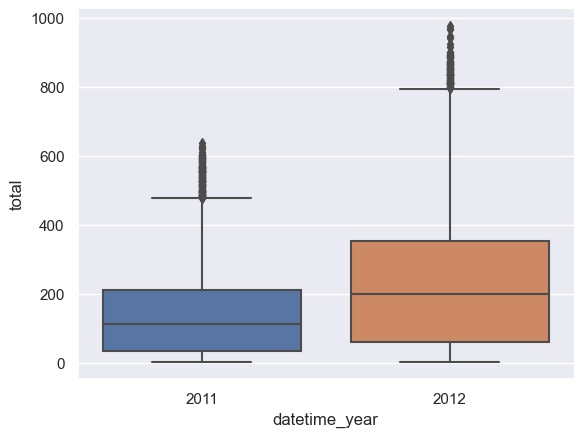

In [41]:
sns.boxplot(data=df[['total', 'datetime_year']],x='datetime_year',y='total')
sns.despine()

In [42]:
df

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,12,December,19,Wednesday


In [43]:
## Plot for 2011 and 2012

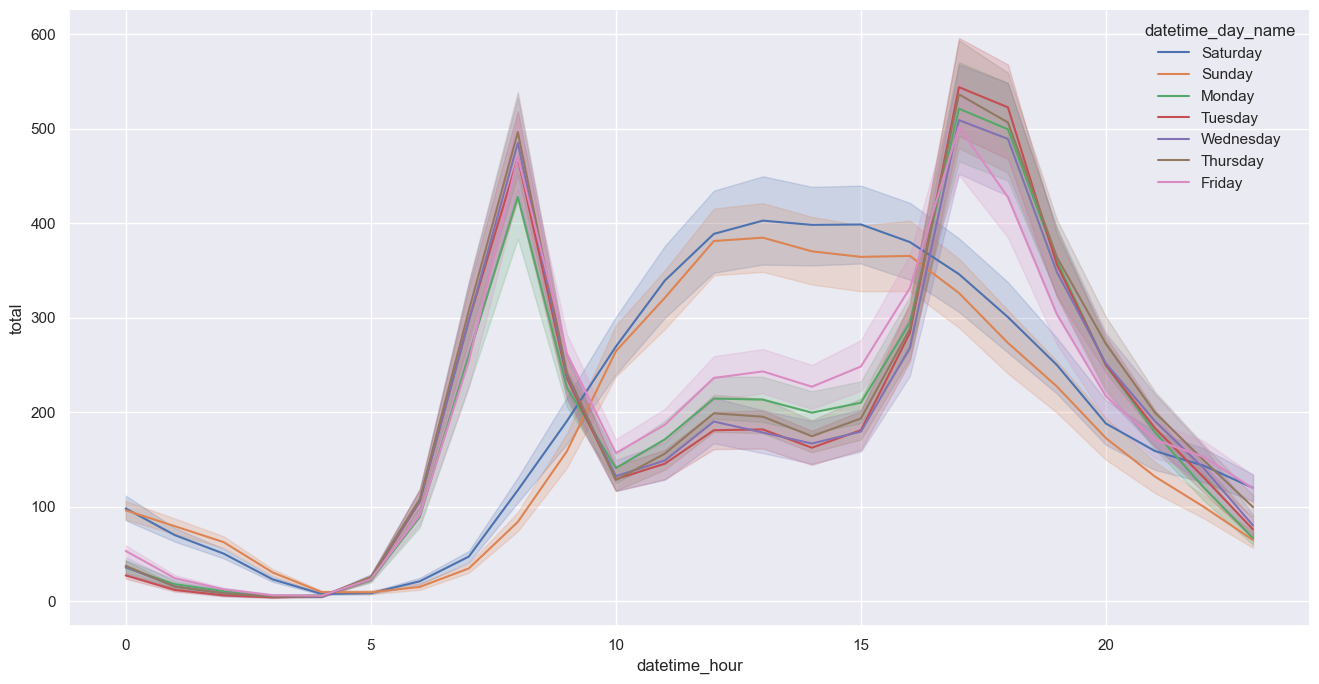

In [44]:
plt.figure(figsize = (16,8))

sns.lineplot(x = 'datetime_hour', y= 'total',hue ='datetime_day_name' , data = df)
sns.despine()

In [45]:
df

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,12,December,19,Wednesday


## How do Seasons have an effect on this trend?

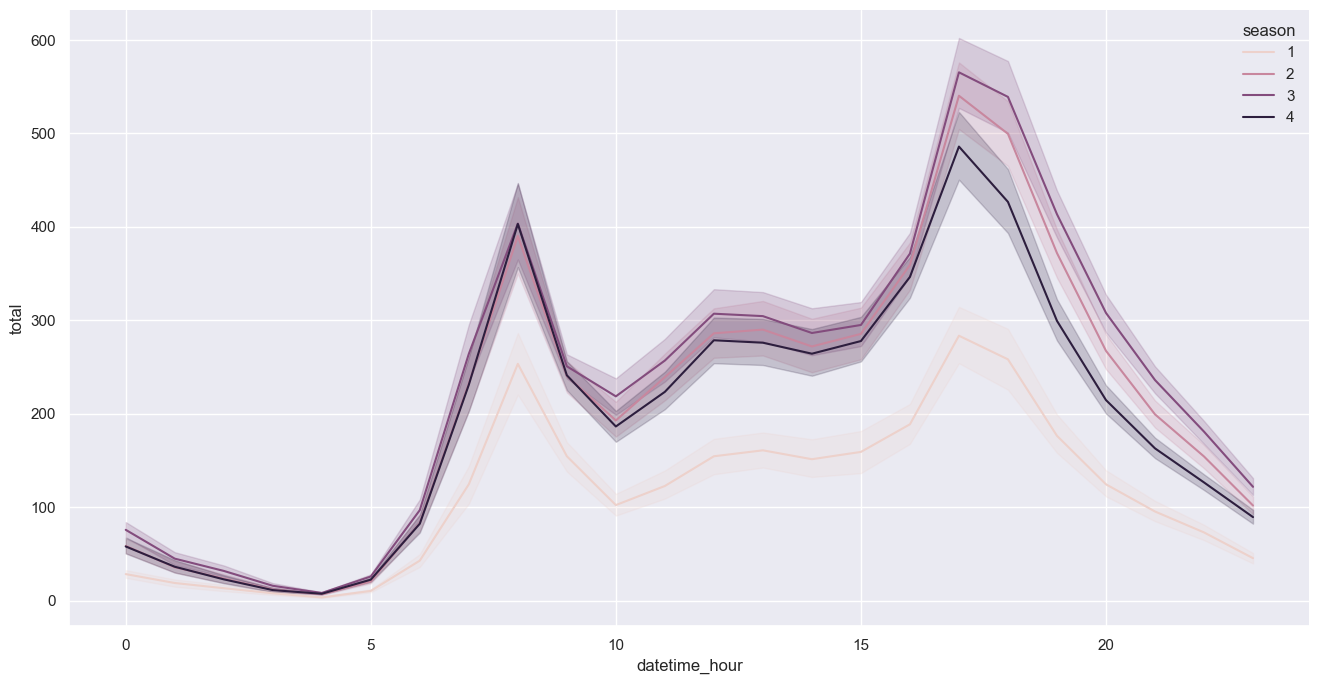

In [46]:
plt.figure(figsize = (16,8))

sns.lineplot(x = 'datetime_hour', y= 'total',hue ='season' , data = df)
sns.despine()

## Preprocessing

In [47]:
# Outlier remove

In [48]:
target = ['total']

/var/folders/g1/stdtphmx6j36mvd7gc84dx3w0000gn/T/ipykernel_12818/3764195199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[target[0]]);


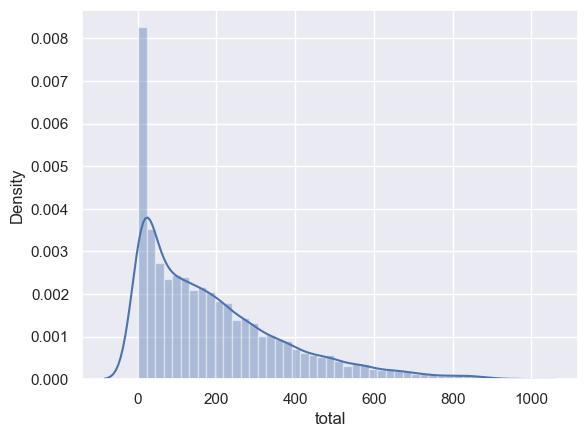

In [49]:
sns.distplot(df[target[0]]);

Samples in train set without outliers: 10586
Number of outliers removed: 300


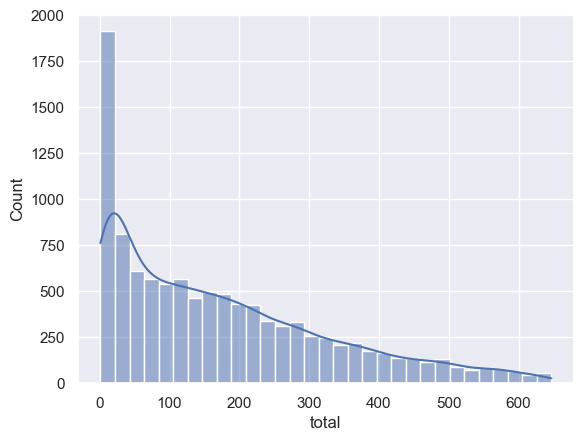

In [50]:

# Calculate IQR and define bounds
q1 = df.total.quantile(0.25)
q3 = df.total.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr) 

# Filter outliers
train_preprocessed = df.loc[(df.total >= lower_bound) & (df.total <= upper_bound)]

print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
print("Number of outliers removed: {}".format(len(df) - len(train_preprocessed)))

# Plot distribution without outliers
sns.histplot(train_preprocessed.total, kde=True);

### Handle Outliers Only in Training: Remove or treat outliers only in the training set and allow the model to encounter outliers in the test set as a true test of its robustness.

In [ ]:
X = df.drop('count','registered' axis=1)
y = df['count']

In [ ]:
linreg = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
linreg.fit(X_train,y_train)

In [ ]:
linreg.score(X_test, y_test)

In [ ]:
# Make a day phase feature

#https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

#https://stackoverflow.com/questions/67556351/trigonometric-functions-how-do-i-write-sine-and-cosine-functions-code-without

In [ ]:
# Extract add Shap values

In [ ]:
#https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability
# https://towardsdatascience.com/explainable-ai-xai-with-shap-regression-problem-b2d63fdca670

#https://medium.com/hepsiburada-data-science/explainable-ai-with-shap-6f629dfa6eef
#https://www.kaggle.com/code/dansbecker/shap-values

#https://neptune.ai/blog/shap-values
#https://christophm.github.io/interpretable-ml-book/limo.html

#https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

#https://christophm.github.io/interpretable-ml-book/shapley.html

#https://www.youtube.com/watch?v=MQ6fFDwjuco&list=PLqDyyww9y-1SJgMw92x90qPYpHgahDLIK

#https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
#After

In [ ]:
####Assumptions of Linear Regression
#The main assumptions are:

#Linearity: The relationship between predictors and the response is linear.
#Independence: Observations are independent of each other.
#Homoscedasticity: Constant variance of residuals (errors).
#Normality of Residuals: Residuals are normally distributed.
#No Multicollinearity: Predictors are not highly correlated with each other.